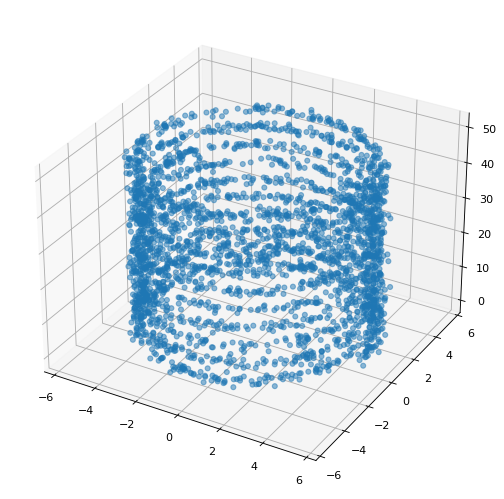

In [1]:
from lib import YouTube
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import sklearn.preprocessing



def helix(radius=5.0, step=5.0, count=1000, noize=0.2):
    """Generate data along a 3D helix."""
    phi = np.random.uniform(0, 2 * np.pi * 10, size=count)
    x = radius * np.cos(phi)
    y = radius * np.sin(phi)
    z = step * phi / (2 * np.pi)
    points = np.dstack([x, y, z])[0] + np.random.normal(0.0, noize, size=(count, 3))
    return points


def scatter3d(data):
    """Show 3D scatter plot."""
    fig = plt.figure(figsize=(8, 8), dpi=80)
    axes = fig.add_subplot(projection="3d")
    axes.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.5)
    return fig

def scatter2d(data):
    """Show 2D scatter plot."""
    fig = plt.figure(figsize=(5, 5), dpi=80)
    axes = fig.gca()
    axes.set_aspect('equal', adjustable='box')
    axes.scatter(data[:, 0], data[:, 1], alpha=0.5)

data = helix(count=3000, noize=0.2)
fig = scatter3d(data)

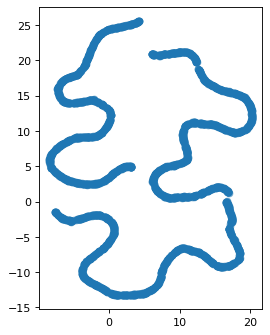

In [2]:
import umap

embeddings = umap.UMAP(
    n_neighbors=30,
    min_dist=0.3,
    metric='euclidean'
).fit_transform(data)

fig = scatter2d(embeddings)

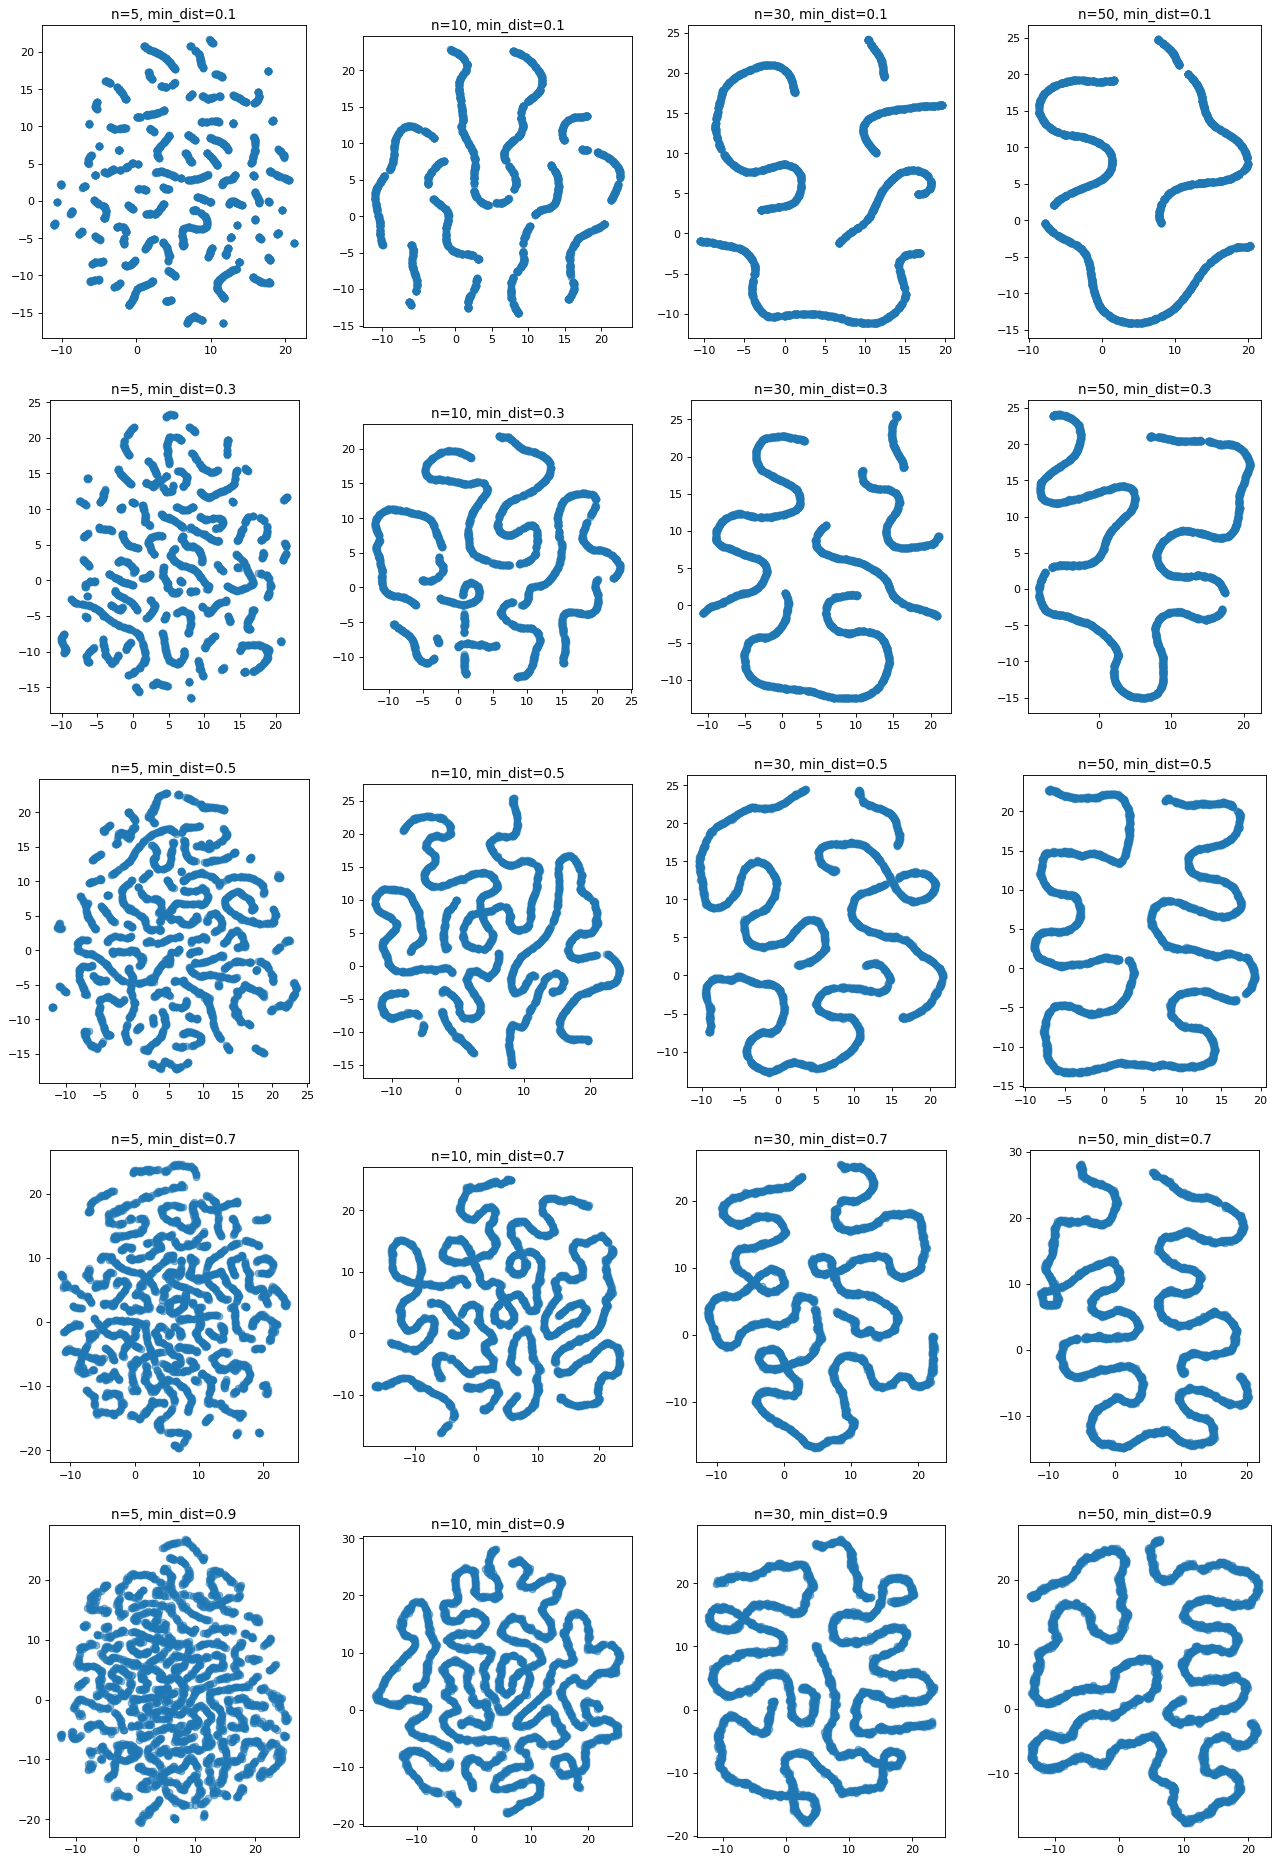

In [12]:
neighbors = [5, 10, 30, 50]
min_dists = [0.1, 0.3, 0.5, 0.7, 0.9]

fig = plt.figure(figsize=(20, 30), dpi=80)
for i, n_neighbors in enumerate(neighbors):
    for j, min_dist in enumerate(min_dists):
        embeddings = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            metric='euclidean'
        ).fit_transform(data)
        
        axes = fig.add_subplot(len(min_dists), len(neighbors), i + j*len(neighbors) + 1)
        axes.set_aspect('equal', adjustable='box')
        axes.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.5)
        axes.title.set_text(f"n={n_neighbors}, min_dist={min_dist}")